In [1]:
import os

In [2]:
root_path = r'D:\master\code\Lung_Nodule\FL_lung_nodule_datasplit_ME_LDCT'

In [3]:
os.path.exists(root_path)

True

In [11]:
files = os.listdir(root_path)

In [12]:
file_context = {}
for file in files:
    with open(os.path.join(root_path, file), 'r') as f:
        lines = f.readlines()
        file_context[file] = lines

In [14]:
file_context


{'all.txt': ['Folder,Filename\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\\LDCT_test_dataset\\CHESTCT_Test0280,CHESTCT_Test0280\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\\LDCT_test_dataset\\CHESTCT_Test0073,CHESTCT_Test0073\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\\LDCT_test_dataset\\CHESTCT_Test0618,CHESTCT_Test0618\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\\ME_dataset\\CHESTCT1539,CHESTCT1539\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\\ME_dataset\\CHEST1106,CHEST1106\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\\LDCT_test_dataset\\CHESTCT_Test0130,CHESTCT_Test0130\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\\ME_dataset\\CHESTCT1754,CHESTCT1754\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\\LDCT_test_dataset\\CHESTCT_Test0429,CHESTCT_Test0429\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\\ME_dataset\\CHEST1182,CHEST1182\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\\LDCT_test_dataset\\CHESTCT_Test0894,CHESTCT_Test0894\n',
  'D:\\master\\code\\Lung_Nodule\\dataset\

In [13]:
for file in files:
    new_context = []
    for line in file_context[file]:
        line_split = line.split('\\')
        if 'D:' in line_split:
            new_line = 'D:\\master\\code\\Lung_Nodule\\dataset'
            for line_spice in line_split[-2:]:
                new_line += rf'\{line_spice}'
        else:
            new_line = line
        new_context.append(new_line)
    file_context[file] = new_context

In [15]:
for file in files:
    with open(os.path.join(root_path, file), 'w') as f:
        for line in file_context[file]:
            f.write(line)

In [5]:
from net.sanet_l3s2 import SANet_L3S2 as sanet
from single_config import net_config

In [6]:
net = sanet(net_config)

=> WARN: SpatialCGNL block uses '4' groups
=> WARN: SpatialCGNL block uses '4' groups
=> WARN: SpatialCGNL block uses '4' groups
=> WARN: SpatialCGNL block uses '4' groups
=> WARN: SpatialCGNL block uses '4' groups


In [36]:
net.rcnn_crop

CropRoi(
  (up2): Sequential(
    (0): Upsample(scale_factor=2.0, mode='trilinear')
    (1): Conv3d(128, 64, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (2): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (3): ReLU(inplace=True)
  )
  (up3): Sequential(
    (0): Upsample(scale_factor=2.0, mode='trilinear')
    (1): Conv3d(64, 64, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (2): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (3): ReLU(inplace=True)
  )
  (back2): Sequential(
    (0): Conv3d(128, 64, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (1): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (2): ReLU(inplace=True)
  )
  (back3): Sequential(
    (0): Conv3d(65, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (2): ReLU(inplace=True)
  )
)

In [ ]:
dir(net)

In [11]:
for param in net.rpn.parameters():
    param.requires_grad = False
for param in net.feature_net.parameters():
    param.requires_grad = False

In [31]:
import torch.nn as nn


In [86]:
for param in net.rcnn_crop.modules():
    if isinstance(param, nn.Conv3d):
        param.reset_parameters()

In [96]:
import torch
t = torch.ones(1000,1)
b = torch.ones(1000,1)
a = t*b
a.shape

torch.Size([1000, 1])

In [98]:
a.mean(dim=0, keepdim=False)*64

tensor([64.])

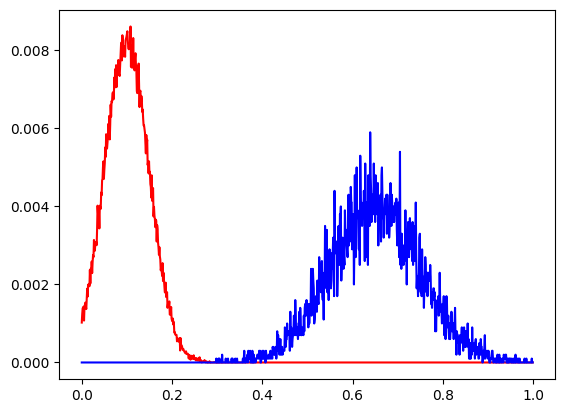

In [152]:
import numpy as np
import matplotlib.pyplot as plt
neg = np.random.normal(0.1, 0.05, 100000)
pos = np.random.normal(0.65, 0.1, 10000)
neg_idx = neg>=0.0
neg = neg[neg_idx]
neg = np.where(neg>0.99, 0.99, neg)
pos_idx = pos<=1.0
pos = pos[pos_idx]
pos = np.where(pos<0.01, 0.01, pos)

bin_width = 0.001
data_min = 0.0
data_max = 1.0
num_bins = 1000

# 初始化每个区间的计数为0
n_o = [0] * num_bins
p_o = [0] * num_bins

# 统计每个区间的数据数量
for d in neg:
    bin_index = int(d // bin_width)

    n_o[bin_index] += 1
for d in pos:
    bin_index = int(d // bin_width)
    p_o[bin_index] += 1
n_o = np.array(n_o)/len(neg)
p_o = np.array(p_o)/len(pos)
# 计算每个区间的起始值
bin_starts = [data_min + i * bin_width for i in range(num_bins)]

# 绘制折线图
plt.plot(bin_starts, n_o,'r')
plt.plot(bin_starts, p_o,'b')

# 添加标签和标


In [155]:
import math
hp = math.pi
lp = 1/math.log(hp)
hn = 3.5
ln = 0.1/math.log(hn)

pos2 = []
neg2 = []
for i in range(len(pos)):
    # pos2.append(p_o[int(pos[i]//bin_width)]*math.exp(-1*pos[i] / lp))
    pos2.append(math.exp(-1*pos[i] / lp))

pos2 = np.array(pos2)
# pos2 = pos2/pos2.sum()

for i in range(len(neg)):
    # neg2.append(n_o[int(neg[i]//bin_width)]*math.exp(neg[i]/ ln))
    neg2.append(math.exp(-1*neg[i]/ ln))

neg2 = np.array(neg2)
neg2 = np.exp(neg) / np.sum(np.exp(neg))
# neg2 = neg2/neg2.sum()


In [151]:
print(neg[:10], math.exp(1.0/lp))
neg2 = np.exp(neg) / np.sum(np.exp(neg))
print(neg2[:10])

[0.17017881 0.14683572 0.10385364 0.08571329 0.15081563 0.14156283
 0.14227396 0.0952808  0.1197417  0.09728833] 3.141592653589793
[1.09343488e-05 1.06820634e-05 1.02326536e-05 1.00487031e-05
 1.07246618e-05 1.06258863e-05 1.06334454e-05 1.01453055e-05
 1.03965289e-05 1.01656931e-05]


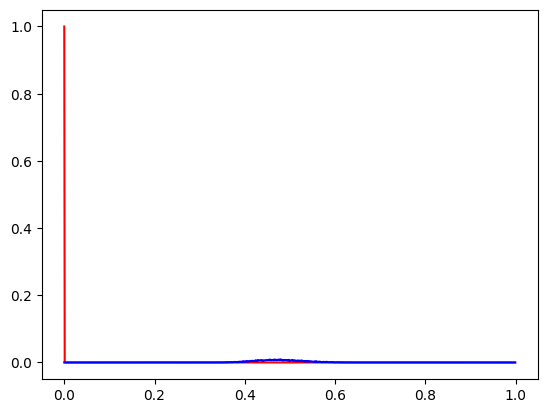

In [156]:
# plt.plot(bin_starts, n_o,'r.')
# plt.plot(bin_starts, p_o,'b.')
n_o2 = [0] * num_bins
p_o2 = [0] * num_bins

# 统计每个区间的数据数量
for d in neg2:
    bin_index = int(d // bin_width)
    n_o2[bin_index] += 1
for d in pos2:
    bin_index = int(d // bin_width)
    p_o2[bin_index] += 1
    
n_o2 = np.array(n_o2)/len(neg)
p_o2 = np.array(p_o2)/len(pos)
# 计算每个区间的起始值
bin_starts = [data_min + i * bin_width for i in range(num_bins)]

# 绘制折线图
plt.plot(bin_starts, n_o2,'r')
plt.plot(bin_starts, p_o2,'b')

# 添加标签和标

In [217]:
def find_nearest(x,y,z):
    stride = 4
    start = (stride-1) / 2
    z_stride = 4
    z_start = (z_stride-1) / 2
    xl = ((x - start) // stride) *stride + start
    xr = xl+stride
    xn = xl if x-xl < xr-x else xr

    yl = ((y - start) // stride) *stride + start
    yr = yl+stride
    yn = yl if y-yl < yr-y else yr

    zl = ((z - z_start) // z_stride) *z_stride + z_start
    zr = zl+z_stride
    zn = zl if z-zl < zr-z else zr

    return xn, yn, zn

def IoU(cord1, shape, cord2, shape2):
    x1, y1, z1 = cord1
    w, h, d = shape      # nodule bbox shape
    x2, y2, z2 = cord2
    aw, ah, ad = shape2  # anchor shape

    x_overlap = min(x1+w/2, x2+aw/2) - max(x1-w/2, x2-aw/2) if (max(x1+w/2, x2+aw/2)-min(x1-w/2, x2-aw/2)) < w+aw else 0
    y_overlap = min(y1+h/2, y2+ah/2) - max(y1-h/2, y2-ah/2) if (max(y1+h/2, y2+ah/2)-min(y1-h/2, y2-ah/2)) < h+ah else 0
    z_overlap = min(z1+d/2, z2+ad/2) - max(z1-d/2, z2-ad/2) if (max(z1+d/2, z2+ad/2)-min(z1-d/2, z2-ad/2)) < d+ad else 0
    v = x_overlap * y_overlap*z_overlap
    return v / (w*h*d+aw*ah*ad-v)

x1, y1, z1,w, h, d = np.array('343	317.5	50.5	7	8	4'.split('\t')).astype(np.float32)

# w, h, d = 6,6,4
# x2, y2, z2 = find_nearest(x1, y1, z1)
anchor_size = [[5,5,5], [9,9,6], [6,6,6]]
for size in anchor_size:
    print(IoU([x1,y1,z1], [w,h,d], find_nearest(x1, y1, z1), size))

0.2913968547641073
0.41434262948207173
0.375


In [222]:
import csv
dir = r'D:\master\code\Lung_Nodule\FL_lung_nodule_datasplit_ME_LDCT\client0_test_annotation.csv'
with open(dir, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['series_id', 'x_center', 'y_center', 'z_center', 'w_mm', 'h_mm', 'd_mm', 'diameter_mm']
['D:\\master\\code\\Lung_Nodule\\dataset\\LDCT_test_dataset\\CHESTCT_Test0655\\mask\\CHESTCT_Test0655_nodule_count.json', '404.0', '180.0', '230.0', '9', '5', '5', '9']
['D:\\master\\code\\Lung_Nodule\\dataset\\LDCT_test_dataset\\CHESTCT_Test0655\\mask\\CHESTCT_Test0655_nodule_count.json', '218.5', '319.0', '174.5', '8', '7', '6', '8']
['D:\\master\\code\\Lung_Nodule\\dataset\\ME_dataset\\CHEST1641\\mask\\CHEST1641_nodule_count.json', '109.0', '315.5', '201.5', '7', '6', '4', '7']
['D:\\master\\code\\Lung_Nodule\\dataset\\ME_dataset\\CHEST1641\\mask\\CHEST1641_nodule_count.json', '180.5', '336.5', '215.5', '6', '6', '4', '6']
['D:\\master\\code\\Lung_Nodule\\dataset\\ME_dataset\\CHEST1062\\mask\\CHEST1062_nodule_count.json', '215.0', '273.5', '74.0', '9', '8', '5', '9']
['D:\\master\\code\\Lung_Nodule\\dataset\\ME_dataset\\CHEST1062\\mask\\CHEST1062_nodule_count.json', '290.0', '334.0', '121.0', '1